In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV

from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics import r2_score
import mglearn



In [2]:
df = pd.read_csv("houses_to_rent.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [4]:
df.count()

Unnamed: 0        6080
city              6080
area              6080
rooms             6080
bathroom          6080
parking spaces    6080
floor             6080
animal            6080
furniture         6080
hoa               6080
rent amount       6080
property tax      6080
fire insurance    6080
total             6080
dtype: int64

In [5]:
 print(df.isnull().sum())

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64


In [6]:
df.shape

(6080, 14)

In [7]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [8]:
df.describe()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000
max,6079.00000,1.000000,24606.000000,10.000000,10.000000,12.000000


# Exploratory Data Analysis

Better understand its characteristics, discover patterns and identify anomalies. This includes a variety of techniques and tools for exploring data sets, such as statistical methods, visualization techniques, and computational tools.

We can also improve the problem description or definition by using the EDA method.

Here we can see that we have categorical and continuous variables, the dependent variable is TARGET

Head - this function returns the object's first rows, between () we can put a number

In [9]:
df['floor'].replace(to_replace='-', value=0, inplace=True)

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df['animal'].replace('acept', 0, inplace = True)
df['animal'].replace('not acept', 1, inplace = True)
df['furniture'].replace('furnished', 0, inplace = True)
df['furniture'].replace('not furnished', 1, inplace = True)

In [12]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,0,0,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,0,1,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,0,0,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,0,1,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,1,1,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [13]:
df.describe()

,city,area,rooms,bathroom,parking spaces,animal,furniture
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,0.232566,0.739803
std,0.343535,375.559485,1.129665,1.438860,1.611909,0.422502,0.438778
min,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,0.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,0.000000,1.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,1.000000,1.000000


In [14]:
money_columns = ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']


In [15]:
df[money_columns] = df[money_columns].replace({'R\$': '', ',': ''}, regex=True)


In [16]:
df.replace(['Sem info', 'Incluso'], np.nan, inplace=True)

In [17]:
df[money_columns] = df[money_columns].astype(float)

In [18]:
df.dropna(inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,0,0,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10,0,1,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3,0,0,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12,0,1,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,0,1,1,0.0,1200.0,41.0,16.0,1257.0


In [21]:
X = df[['furniture','area','hoa', 'property tax', 'fire insurance', 'total', 'rooms', 'bathroom', 'animal']]

In [22]:
y = df['rent amount']

In [23]:

X.shape, y.shape

((5660, 9), (5660,))

In [24]:
print(X, y)

      furniture  area     hoa  property tax  fire insurance    total  rooms  \
0             0   240     0.0        1000.0           121.0   9121.0      3   
1             1    64   540.0         122.0            11.0   1493.0      2   
2             0   443  4172.0        1417.0            89.0  12680.0      5   
3             1    73   700.0         150.0            16.0   2116.0      2   
4             1    19     0.0          41.0            16.0   1257.0      1   
...         ...   ...     ...           ...             ...      ...    ...   
6075          1    50   420.0           0.0            15.0   1585.0      2   
6076          0    84   768.0          63.0            37.0   3768.0      2   
6077          1    48   250.0          42.0            13.0   1255.0      1   
6078          1   160     0.0         250.0            53.0   3803.0      3   
6079          0    60   489.0           0.0            25.0   2414.0      2   

      bathroom  animal  
0            3       0  
1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4528, 9), (1132, 9), (4528,), (1132,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4245, 9), (1415, 9), (4245,), (1415,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3962, 9), (1698, 9), (3962,), (1698,))

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
reg = KNeighborsRegressor(n_neighbors=3)

# Treinar o modelo
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
accuracy = reg.score(X_test, y_test)
print("Accuracy:", accuracy)
accuracy = reg.score(X_test, y_test)
print("Test set R^2: {:.2f}".format(accuracy))

Accuracy: 0.992344064231961
Test set R^2: 0.99


In [34]:
print("Test set predictions:n{}".format(reg.predict(X_test)))

Test set predictions:n[3106.66666667 2200.         2350.         ... 4080.66666667 2383.33333333
 1250.        ]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


In [36]:
reg = KNeighborsRegressor(n_neighbors=3)


In [37]:
test_sizes = [0.2, 0.25, 0.3]

In [38]:
for test_size in test_sizes:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    scores = cross_val_score(reg, X_train, y_train, cv=3)

In [39]:
print(f"Test size: {0.2}")
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())
print()

Test size: 0.2
Cross-validated scores: [0.9886492  0.94790447 0.97326385]
Mean accuracy: 0.9699391715792549
Standard deviation of accuracy: 0.016799272894012597



In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
print(f"Test size: {0.25}")
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())
print()

Test size: 0.25
Cross-validated scores: [0.9886492  0.94790447 0.97326385]
Mean accuracy: 0.9699391715792549
Standard deviation of accuracy: 0.016799272894012597



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
print(f"Test size: {0.30}")
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())
print()

Test size: 0.3
Cross-validated scores: [0.9886492  0.94790447 0.97326385]
Mean accuracy: 0.9699391715792549
Standard deviation of accuracy: 0.016799272894012597



In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [45]:
param_grid = {'n_neighbors' : [3,5,7,9],
'weights': ['uniform', 'distance'] }

In [46]:
reg = KNeighborsRegressor()

In [47]:
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [49]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [50]:
best_model = grid_search.best_estimator_

In [51]:
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.9836979733478659


In [67]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [68]:
svm_regressor = SVR()

In [69]:
svm_regressor.fit(X_train_20, y_train_20)

y_pred_20 = svm_regressor.predict(X_test_20)
mse_20 = mean_squared_error(y_test_20, y_pred_20)
print("Mean Squared Error (20%):", mse_20)

Mean Squared Error (20%): 11123964.689783547


In [70]:
svm_regressor.fit(X_train_25, y_train_25)

# Avaliar o desempenho nos conjuntos de teste (25%)
y_pred_25 = svm_regressor.predict(X_test_25)
mse_25 = mean_squared_error(y_test_25, y_pred_25)
print("Mean Squared Error (25%):", mse_25)

Mean Squared Error (25%): 11480237.715902926


In [71]:
svm_regressor.fit(X_train_30, y_train_30)
y_pred_30 = svm_regressor.predict(X_test_30)
mse_30 = mean_squared_error(y_test_30, y_pred_30)
print("Mean Squared Error (30%):", mse_30)

Mean Squared Error (30%): 11617301.718115427


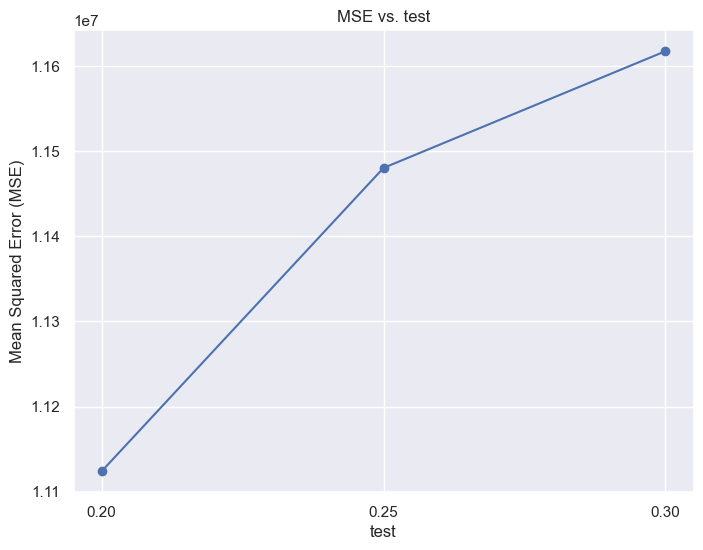

In [72]:
import matplotlib.pyplot as plt

# Lista de proporções de teste
test_sizes = [0.2, 0.25, 0.3]

# Lista de MSEs correspondentes
mses = [mse_20, mse_25, mse_30]

# Plotar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(test_sizes, mses, marker='o', linestyle='-')
plt.title('MSE vs. test')
plt.xlabel('test')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(test_sizes)
plt.grid(True)
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [66]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Criar o modelo SVM
svm = SVR()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar o modelo aos dados
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Melhor pontuação do modelo
print("Melhor pontuação:", grid_search.best_score_)

Melhores hiperparâmetros: {'C': 10, 'gamma': 0.001}
Melhor pontuação: -14541475.028251786
